In [153]:
import pandas as pd
import pycountry
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid
from matplotlib.pyplot import figure

In [154]:
df = pd.read_csv("../output/processed/coords.csv")

In [155]:
X = df[["lat","lon"]]

In [156]:
X

,lat,lon
0,1.576766,42.548654
1,134.489563,-25.734968
2,28.046788,53.539998
3,50.559644,26.022407
4,-51.619789,-9.588903
...,...,...
150,-11.029862,10.785546
151,-97.922211,39.381266
152,39.616032,8.626220
153,71.042004,38.838508


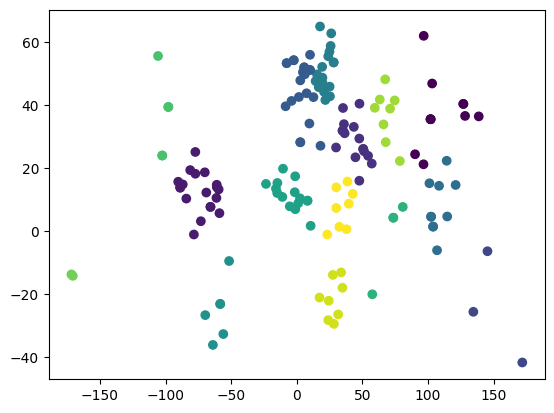

In [157]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=15, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(X)
clf = NearestCentroid()
clf.fit(X, labels)
plt.scatter(X["lat"], X.lon, c=labels)
plt.show()

In [158]:
print(len(clf.centroids_))
print(max(labels))
print(len(X))

15
14
155


In [159]:
lst = []
s = len(X)
# 6 zoom levels
for i in range(6):
    s -= 23
    lst.append(s)
lst

[132, 109, 86, 63, 40, 17]

In [160]:
def func(x,y):
    return y[x-1]

In [161]:
for count,i in enumerate(lst):
    hierarchical_cluster = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward')
    labels = hierarchical_cluster.fit_predict(X)
    clf = NearestCentroid()
    clf.fit(X, labels)
    df["temp"] = labels
    df[f"lvl_{count+1}"] = df.apply(lambda x: func(x["temp"], clf.centroids_), axis=1)


In [162]:
def func(x,y):
    return [x,y]
df[0] = df.apply(lambda x: func(x["lat"], x["lon"]), axis=1)
df.drop(["temp"], inplace=True, axis=1)
df

,country,lat,lon,lvl_1,lvl_2,lvl_3,lvl_4,lvl_5,lvl_6,0
0,ad,1.576766,42.548654,"[4.63357500000001, 50.438696]","[37.8578818658854, 0.529862476788944]","[-66.86191324585961, 9.139149493211727]","[52.73061702384787, 24.51911793632284]","[34.608483256655056, 32.294710615782485]","[-59.68823900710117, -25.316052973191976]","[1.57676643468505, 42.5486542501806]"
1,au,134.489563,-25.734968,"[33.739163883354, -13.2158036349607]","[33.739163883354, -13.2158036349607]","[114.16255, 22.279356]","[103.04188609591648, 2.92412939142931]","[-5.05365922916536, 53.7717138739353]","[3.6337333941119363, 45.35517438330344]","[134.489562606981, -25.7349684916223]"
2,by,28.046788,53.539998,"[10.5257705053847, 1.61213015485833]","[10.5257705053847, 1.61213015485833]","[-1.25214497310038, 17.3503352399376]","[7.43305046935553, 51.769231074064855]","[75.90894203637616, 5.321944172984776]","[107.80584755780778, 7.639533310158515]","[28.0467875099009, 53.5399976445262]"
3,ba,50.559644,26.022407,"[145.241749381464, -6.4783775316607]","[-65.801997444749, 7.61957014788959]","[145.241749381464, -6.4783775316607]","[35.397913224031235, 33.261465080084264]","[9.87549703067147, 40.115779872293]","[150.503737394794, -24.684073748265234]","[50.5596439032492, 26.0224069941867]"
4,br,-51.619789,-9.588903,"[24.8625932740492, 56.9590654127872]","[47.720341220495, 40.418259613178]","[47.720341220495, 40.418259613178]","[66.86085385482406, 31.012595265764347]","[-76.50129892644007, 20.285231112755397]","[130.11419311182826, 38.40423198071578]","[-51.6197890205486, -9.58890301712257]"
...,...,...,...,...,...,...,...,...,...,...
150,gi,-11.029862,10.785546,"[78.476681027237, 22.1991660760527]","[78.476681027237, 22.1991660760527]","[-60.70128247195785, 13.049443879914376]","[61.276874652478796, 40.43636091499125]","[50.846777409772486, 23.131172670623688]","[43.34720506804371, 28.86992410804211]","[-11.0298621655307, 10.7855460398783]"
151,us,-97.922211,39.381266,"[-60.994999749152456, 14.2752089089511]","[73.51104943, 4.17887365]","[66.86085385482406, 31.012595265764347]","[-51.6197890205486, -9.58890301712257]","[-51.6197890205486, -9.58890301712257]","[98.86334910757573, 37.25598566138709]","[-97.9222112121185, 39.3812661305678]"
152,et,39.616032,8.626220,"[27.4306751716734, -14.0049082837326]","[-79.2788366062275, 18.729978376984597]","[26.199539005192, 62.7777539652943]","[75.90894203637616, 5.321944172984776]","[19.82710359840087, 46.32419672393325]","[27.647414158930975, -21.65550569415035]","[39.6160319910272, 8.62621960079895]"
153,tj,71.042004,38.838508,"[-2.36966957036279, 54.2379333607472]","[2.63238813336793, 28.1632395923063]","[-88.76116637588902, 14.460261897310225]","[127.28818096593632, 39.07681170033677]","[-2.105715555957447, 42.81735228973903]","[-171.23579140515602, -14.0718675933665]","[71.0420037711059, 38.8385084835418]"


6 zoom levels.